<a href="https://colab.research.google.com/github/ali7432/PotatoWeedLeaf_Classification_CNN/blob/main/TransferLearning/Potato_Weed_leaf_Classification_MobileNetv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries
We used following libraries

* **Matplotlib**
To draw the training progress plot for training accuracy, validation accuracy, training loss and valiadation loss.
* **Tensoflow&Keras**
To design and train Deep Learning Model.
* **Sklearn**
To calculate and draw the  confusion matrix.

In [1]:
import IPython.display as display
import matplotlib.pyplot as plt
import numpy as np
import keras
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import and PreProcess Data

In [2]:
train_dir = "/Dataset/train"
validation_dir = "/Dataset/val"

In [3]:
# Image size that we are going to use
IMG_SIZE = 128
# Our images are RGB (3 channels)
N_CHANNELS = 3
# Weed + Potato
N_CLASSES = 2
# Batch Size
BATCH_SIZE=16

Tabel 1

>For | No. of Samples
>--- | ---
> Training| 336
> Testing | 75

Tabel 2 (Training Data)  
>Class | No. of Samples
>--- | ---
> Potato| 138
> Weeds | 198

Tabel 3 (Testing Data)    
>Class | No. of Samples
>--- | ---
> Potato| 31
> Weeds | 44

In [20]:
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    horizontal_flip=True,
    vertical_flip=True)
val_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,)
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(IMG_SIZE, IMG_SIZE),  # All images will be resized to 128x128
        batch_size=BATCH_SIZE,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='binary',
        shuffle=False)

Found 336 images belonging to 2 classes.
Found 75 images belonging to 2 classes.


## Design Network

In [26]:
base_model = tf.keras.applications.MobileNetV2(input_shape=[128,128, 3], include_top=False)
base_model.trainable = False
inputs = Input(shape=(128,128, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(1,activation='sigmoid')(x)
model = tf.keras.Model(inputs, outputs)

In [27]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train Network 

In [28]:
# No of EPOCHS
EPOCH=20

history=model.fit(train_generator, epochs=EPOCH, validation_data=validation_generator,verbose=2)

Epoch 1/20
21/21 - 9s - loss: 0.5958 - accuracy: 0.6905 - val_loss: 0.5271 - val_accuracy: 0.7200
Epoch 2/20
21/21 - 6s - loss: 0.3521 - accuracy: 0.8661 - val_loss: 0.3248 - val_accuracy: 0.9067
Epoch 3/20
21/21 - 6s - loss: 0.2603 - accuracy: 0.9256 - val_loss: 0.2091 - val_accuracy: 0.9600
Epoch 4/20
21/21 - 6s - loss: 0.1896 - accuracy: 0.9643 - val_loss: 0.1650 - val_accuracy: 0.9600
Epoch 5/20
21/21 - 6s - loss: 0.1497 - accuracy: 0.9762 - val_loss: 0.1487 - val_accuracy: 0.9600
Epoch 6/20
21/21 - 6s - loss: 0.1524 - accuracy: 0.9643 - val_loss: 0.1228 - val_accuracy: 0.9733
Epoch 7/20
21/21 - 6s - loss: 0.1241 - accuracy: 0.9851 - val_loss: 0.1084 - val_accuracy: 0.9733
Epoch 8/20
21/21 - 6s - loss: 0.1125 - accuracy: 0.9762 - val_loss: 0.0996 - val_accuracy: 0.9733
Epoch 9/20
21/21 - 6s - loss: 0.1237 - accuracy: 0.9673 - val_loss: 0.0953 - val_accuracy: 0.9600
Epoch 10/20
21/21 - 6s - loss: 0.1066 - accuracy: 0.9673 - val_loss: 0.0876 - val_accuracy: 0.9733
Epoch 11/20
21/21 -

## Plot Training Progress

Text(0.5, 1.0, 'Training and validation loss')

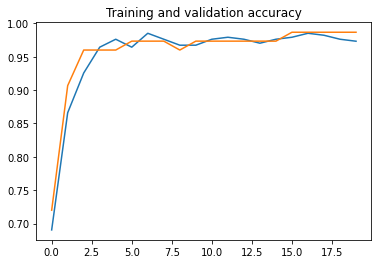

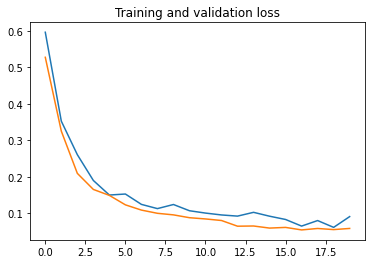

In [29]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

## Evaluate Model

In [30]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion matrix, without normalization


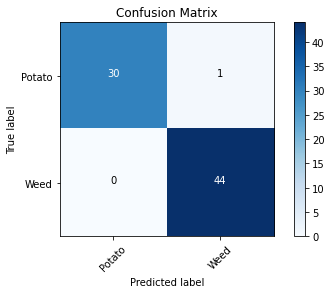

In [32]:
y_true = validation_generator.classes
y_pred=model.predict_generator(validation_generator)
y_pred = np.rint(y_pred)
cm=confusion_matrix(y_true,y_pred)

class_names = ['Potato','Weed']
plot_confusion_matrix(cm=cm, classes=class_names, title='Confusion Matrix')